In [110]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [113]:
df['Admit']=(df['Chance of Admit ']>.9)

In [114]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit'],
      dtype='object')

In [115]:
X = df[["GRE Score", "TOEFL Score", 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].copy()
y = df['Admit'].copy()

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 10)

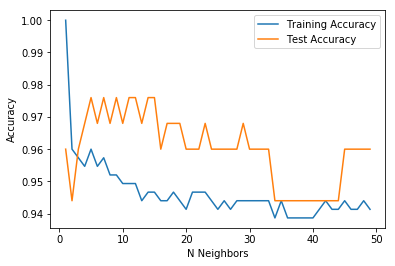

In [119]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,50)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.xlabel("N Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
X = df[["GRE Score", "TOEFL Score", 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].copy()
y = df['Chance of Admit '].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print("Training Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Score: {:.2f}".format(lr.score(X_test, y_test)))

Training Score: 0.83
Test Score: 0.80


In [128]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train, y_train)

print("Ridge Regression Training Score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Regression Test Score: {:.2f}".format(ridge.score(X_test, y_test)))


Ridge Regression Training Score: 0.83
Ridge Regression Test Score: 0.80
